In [36]:
import numpy as np
import pandas as pd
from DataProcessing import Data

# 1. Get Data 

## 1.1. Get Data from folder

In [37]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [38]:
chosen_index = 'ORCL'

In [39]:
d.preprocess(chosen_index)

Saved ORCL data at data/proccessed/ORCL.csv


In [40]:
df = d.get_data(chosen_index)

In [41]:
df.head

<bound method NDFrame.head of             Date       Close    Volume        RSI        MFI         EMA   
0     2019-04-01   50.291233  15191700  60.645953  48.929325   49.156719  \
1     2019-04-02   49.895016  10812100  56.389216  42.759702   49.255159   
2     2019-04-03   49.812092  12853400  55.865344  44.719640   49.329416   
3     2019-04-04   49.590950   9978800  55.034338  51.845073   49.364287   
4     2019-04-05   49.692307  10016300  52.821127  48.880394   49.408023   
...          ...         ...       ...        ...        ...         ...   
1240  2024-03-05  110.940002   8242000  42.242353  54.748951  112.204610   
1241  2024-03-06  112.269997   6706400  44.595306  55.010320  112.213328   
1242  2024-03-07  114.540001   7670100  54.583345  62.413851  112.523551   
1243  2024-03-08  112.419998   8304100  52.795975  62.731536  112.509744   
1244  2024-03-11  114.129997  19797400  65.187188  74.566241  112.725778   

             SO        MACD  Next Day Price  
0     98.08

In [42]:
df.columns

Index(['Date', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split

In [44]:
X = df[df.columns[1:8]].values
Y = df[df.columns[8]].values

## 2.1. Split data

### 2.1.2. Unchronologically

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37)

### 2.1.2. Chronologically

In [46]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

## 2.2. Train model

In [47]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.4852551230566493

## Plot Result

In [48]:
import matplotlib.pyplot as plt

In [49]:
Y_predict = model.predict(X_test)

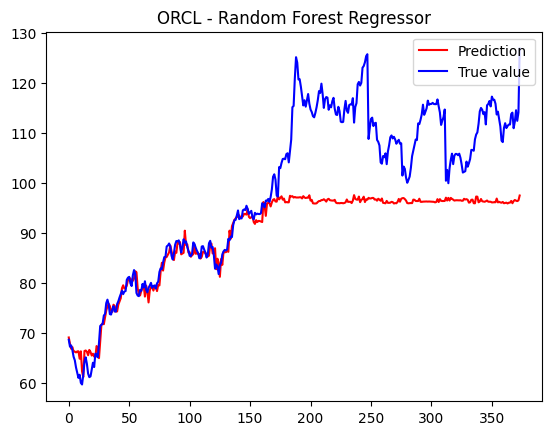

In [50]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Random Forest Regressor')
plt.show()